In [1]:
import numpy as np
import pandas as pd
import os
seed=42
np.random.seed(seed)
import os
dir_path='C:\\Data Science\\kaggle regr competion'
file_name='preprocessedtrain.csv'
dataset=pd.read_csv(os.path.join(dir_path,file_name))

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Columns: 220 entries, MSSubClass to PavedDrive_Y
dtypes: float64(4), int64(216)
memory usage: 2.2 MB


In [3]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [21]:
num_dep__var=['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [22]:
len(num_dep__var)

31

In [12]:
X2=dataset_2=dataset[num_dep__var]
y2=dataset.SalePrice

Index(['GarageArea', 'OpenPorchSF'], dtype='object')


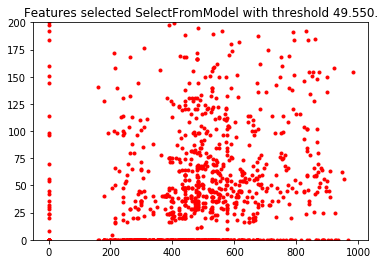

Index(['WoodDeckSF', 'EnclosedPorch'], dtype='object')


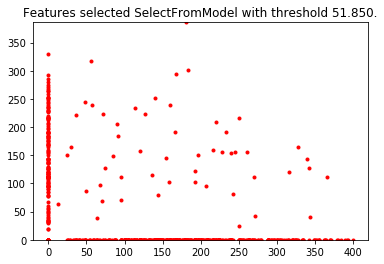

Index(['TotalBsmtSF', '2ndFlrSF'], dtype='object')


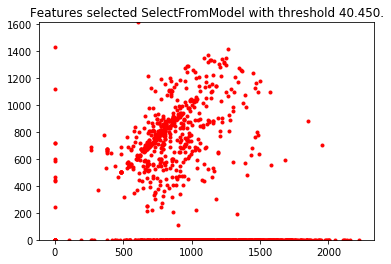

Index(['BsmtFinSF1', 'GrLivArea'], dtype='object')


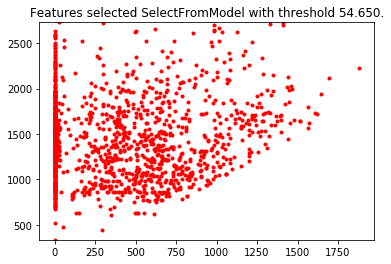

Index(['MasVnrArea', '1stFlrSF'], dtype='object')


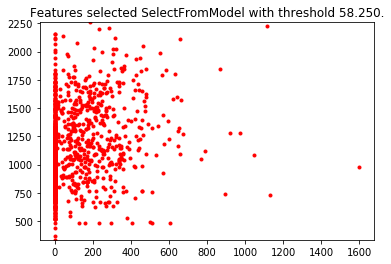

Index(['LotFrontage'], dtype='object')


IndexError: index 1 is out of bounds for axis 1 with size 1

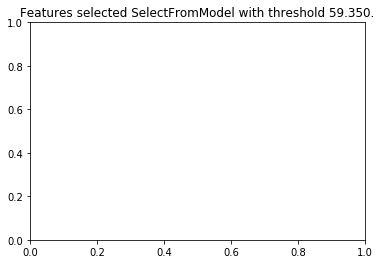

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

opt_num_feat=[]

num_dep__var=['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

for i in range(10):    
    X2=dataset_2=dataset[num_dep__var]
    y2=dataset.SalePrice
    new_col=[]

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
    clf = LassoCV()

# Set a minimum threshold of 0.25
    sfm = SelectFromModel(clf, threshold=0.25)
    sfm.fit(X2, y2)
    n_features = sfm.transform(X2).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
    while n_features > 2:
        sfm.threshold += 0.1
        X_transform = sfm.transform(X2)
        n_features = X_transform.shape[1]
    
    print(X2.columns[sfm.get_support()]) 
    opt_num_feat.append(X2.columns[sfm.get_support()])
    for j in range(2):
        try:
            num_dep__var.remove((str(X2.columns[sfm.get_support()][j])))
        except:
                pass
    # Plot the selected two features from X.
    plt.title(
    "Features selected SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
    feature1 = X_transform[:, 0]
    feature2 = X_transform[:, 1] 
    plt.plot(feature1, feature2, 'r.')
    X2.columns[sfm.get_support()][0]
    X2.columns[sfm.get_support()][1]
    plt.ylim([np.min(feature2), np.max(feature2)])
    plt.show()

In [31]:
opt_num_feat

[Index(['GarageArea', 'OpenPorchSF'], dtype='object'),
 Index(['WoodDeckSF', 'EnclosedPorch'], dtype='object'),
 Index(['TotalBsmtSF', '2ndFlrSF'], dtype='object'),
 Index(['BsmtFinSF1', 'GrLivArea'], dtype='object'),
 Index(['MasVnrArea', '1stFlrSF'], dtype='object'),
 Index(['LotFrontage'], dtype='object')]